# Task 1
###  Develop a classifier to differentiate between natural and human fire causes, so a binary classifcation. Part a aims at finding the best classifier you can, part b at finding a classifier that also works well, but is interpretable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## CLASSIFICATION PACKAGES ##
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

### First we'll try some predictions with region as a variable within the classifier

In [6]:
df = pd.read_csv('task3df.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
print(df.shape)
# df.columns
df.dropna(inplace=True)
print(df.shape)

(11455, 65)
(7791, 65)


In [12]:
# df = pd.read_csv('task3df.csv')
# df.drop(columns = ['Unnamed: 0'], inplace=True)

# X = df[[
#     'fm.mean', 'Wind.mean', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY',
#     'FIRE_YEAR', 'cont_time', 'PROJECTED_FINAL_IM_COST', 'ACRES',
#     'TOTAL_PERSONNEL', 'STR_DAMAGED', 'WF_FSR', 'FATALITIES', 'FIRE_SIZE',
#     'eco1_10  NORTH AMERICAN DESERTS', 'eco1_11  MEDITERRANEAN CALIFORNIA',
#     'eco1_12  SOUTHERN SEMIARID HIGHLANDS', 'eco1_13  TEMPERATE SIERRAS',
#     'eco1_15  TROPICAL WET FORESTS', 'eco1_2  TUNDRA', 'eco1_3  TAIGA',
#     'eco1_5  NORTHERN FORESTS', 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS',
#     'eco1_7  MARINE WEST COAST FOREST', 'eco1_8  EASTERN TEMPERATE FORESTS',
#     'eco1_9  GREAT PLAINS', 'FUEL_MODEL_Brush (2 feet)',
#     'FUEL_MODEL_Chaparral (6 feet)', 'FUEL_MODEL_Closed Timber Litter',
#     'FUEL_MODEL_Dormant Brush, Hardwood Slash',
#     'FUEL_MODEL_Hardwood Litter', 'FUEL_MODEL_Heavy Logging Slash',
#     'FUEL_MODEL_Light Logging Slash', 'FUEL_MODEL_Medium Logging Slash',
#     'FUEL_MODEL_Short Grass (1 foot)', 'FUEL_MODEL_Southern Rough',
#     'FUEL_MODEL_Tall Grass (2.5 feet)',
#     'FUEL_MODEL_Timber (Grass and Understory)',
#     'FUEL_MODEL_Timber (Litter and Understory)', 'GROWTH_POTENTIAL_Extreme',
#     'GROWTH_POTENTIAL_High', 'GROWTH_POTENTIAL_Low',
#     'GROWTH_POTENTIAL_Medium', 'TERRAIN_Extreme', 'TERRAIN_High',
#     'TERRAIN_Low', 'TERRAIN_Medium', 'FIRE_SIZE_CLASS_A',
#     'FIRE_SIZE_CLASS_B', 'FIRE_SIZE_CLASS_C', 'FIRE_SIZE_CLASS_D',
#     'FIRE_SIZE_CLASS_E', 'FIRE_SIZE_CLASS_F', 'FIRE_SIZE_CLASS_G'
#     ]].copy()

X = df[['fm.mean', 'Wind.mean', #'LATITUDE', 'LONGITUDE',
               # add in responses from 3
       'cont_time',
       'PROJECTED_FINAL_IM_COST', 'TOTAL_PERSONNEL_SUM', 'STR_DAMAGED_TOTAL',
       'FATALITIES', 'FIRE_SIZE',
        # dummies
 'eco1_10  NORTH AMERICAN DESERTS',
       'eco1_11  MEDITERRANEAN CALIFORNIA',
       'eco1_12  SOUTHERN SEMIARID HIGHLANDS', 'eco1_13  TEMPERATE SIERRAS',
       'eco1_15  TROPICAL WET FORESTS', 'eco1_5  NORTHERN FORESTS',
       'eco1_6  NORTHWESTERN FORESTED MOUNTAINS',
       'eco1_7  MARINE WEST COAST FOREST', 'eco1_8  EASTERN TEMPERATE FORESTS',
       'eco1_9  GREAT PLAINS', 'FUEL_MODEL_Brush (2 feet)',
       'FUEL_MODEL_Chaparral (6 feet)', 'FUEL_MODEL_Closed Timber Litter',
       'FUEL_MODEL_Dormant Brush, Hardwood Slash',
       'FUEL_MODEL_Hardwood Litter', 'FUEL_MODEL_Heavy Logging Slash',
       'FUEL_MODEL_Light Logging Slash', 'FUEL_MODEL_Medium Logging Slash',
       'FUEL_MODEL_Short Grass (1 foot)', 'FUEL_MODEL_Southern Rough',
       'FUEL_MODEL_Tall Grass (2.5 feet)',
       'FUEL_MODEL_Timber (Grass and Understory)',
       'FUEL_MODEL_Timber (Litter and Understory)', 
       'TERRAIN_Extreme', 'TERRAIN_High', 'TERRAIN_Low', 'TERRAIN_Medium',
       'GROWTH_POTENTIAL_Extreme', 'GROWTH_POTENTIAL_High',
       'GROWTH_POTENTIAL_Low', 'GROWTH_POTENTIAL_Medium', 'SEASON_fall',
       'SEASON_spring', 'SEASON_summer', 'SEASON_winter',
        # add in fire class
        'FIRE_SIZE_CLASS_A',
       'FIRE_SIZE_CLASS_B', 'FIRE_SIZE_CLASS_C', 'FIRE_SIZE_CLASS_D',
       'FIRE_SIZE_CLASS_E', 'FIRE_SIZE_CLASS_F', 'FIRE_SIZE_CLASS_G',
        ]].copy()
regions = [
     'eco1_10  NORTH AMERICAN DESERTS',
 'eco1_11  MEDITERRANEAN CALIFORNIA',
 'eco1_12  SOUTHERN SEMIARID HIGHLANDS',
 'eco1_13  TEMPERATE SIERRAS',
 'eco1_15  TROPICAL WET FORESTS',
 'eco1_5  NORTHERN FORESTS',
 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS',
 'eco1_7  MARINE WEST COAST FOREST',
 'eco1_8  EASTERN TEMPERATE FORESTS',
 'eco1_9  GREAT PLAINS',
]

# 1 = caused by lightning
# 0 = caused by humans
y = df[['STAT_CAUSE_DESCR_Lightning']].copy()

In [13]:
y.sum() / y.shape[0]

STAT_CAUSE_DESCR_Lightning    0.587858
dtype: float64

## Part (a) - No Interpretation

In [14]:
def per_class_acc(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    per_class_acc = cm.diagonal()
    
    return per_class_acc[0], per_class_acc[1]
    
    
print("==================")
print("=== No Scaling ===")
print("==================")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("\n=== AdaBoost ===")
abc = AdaBoostClassifier().fit(X_train, y_train.values.ravel())
y_pred = abc.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {abc.score(X_test, y_test)}")

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {rf.score(X_test, y_test)}")

print("\n=== Logistic Regression ===")
lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {knn.score(X_test, y_test)}")

print("\n=== Support Vector Classifier ===")
svm = LinearSVC().fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {svm.score(X_test, y_test)}")

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {dtc.score(X_test, y_test)}")

=== No Scaling ===

=== AdaBoost ===
0.6658114175753689
Per class acc: (0.6573208722741433, 0.8920392584514721)
Total acc: 0.7953816549069916

=== Random Forest ===
0.6446440025657473
Per class acc: (0.7087227414330218, 0.8920392584514721)
Total acc: 0.8165490699166132

=== Logistic Regression ===
0.6715843489416292
Per class acc: (0.5669781931464174, 0.8386041439476554)
Total acc: 0.72674791533034

=== K Nearest Neighbours ===
0.608723540731238
Per class acc: (0.5700934579439252, 0.7339149400218102)
Total acc: 0.6664528543938422

=== Support Vector Classifier ===
0.5336754329698524
Per class acc: (0.6588785046728972, 0.6684841875681571)
Total acc: 0.6645285439384221

=== Decision Tree Classifier ===
0.5926876202694035
Per class acc: (0.6900311526479751, 0.7906215921483097)
Total acc: 0.7491982039769083


/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
X.head()

,fm.mean,Wind.mean,cont_time,PROJECTED_FINAL_IM_COST,TOTAL_PERSONNEL_SUM,STR_DAMAGED_TOTAL,FATALITIES,FIRE_SIZE,eco1_10 NORTH AMERICAN DESERTS,eco1_11 MEDITERRANEAN CALIFORNIA,...,SEASON_spring,SEASON_summer,SEASON_winter,FIRE_SIZE_CLASS_A,FIRE_SIZE_CLASS_B,FIRE_SIZE_CLASS_C,FIRE_SIZE_CLASS_D,FIRE_SIZE_CLASS_E,FIRE_SIZE_CLASS_F,FIRE_SIZE_CLASS_G
0,10.985502,3.488843,15.0,78000000.0,17263.0,0.0,0.0,16823.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10.985502,3.488843,4.0,3200000.0,5231.0,0.0,0.0,7700.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9.663947,3.234608,2.0,1050000.0,1893.0,0.0,0.0,90.0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,9.210919,3.968037,0.0,1900000.0,2002.0,1.0,0.0,2.0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,9.210919,3.968037,8.0,1900000.0,2002.0,1.0,0.0,16100.0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [16]:
print("====================")
print("=== With Scaling ===")
print("====================")
    
# Scale continuous variables
scaler = StandardScaler()
X.loc[:,X.columns[0:8]] = scaler.fit_transform(X[(X.columns[0:8])])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("\n=== AdaBoost ===")
abc = AdaBoostClassifier().fit(X_train, y_train.values.ravel())
y_pred = abc.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {abc.score(X_test, y_test)}")

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {rf.score(X_test, y_test)}")

print("\n=== Logistic Regression ===")
lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {knn.score(X_test, y_test)}")

print("\n=== Support Vector Classifier ===")
svm = LinearSVC().fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {svm.score(X_test, y_test)}")

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
print(y_pred.sum()/ y_pred.shape[0])
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {dtc.score(X_test, y_test)}")


=== With Scaling ===

=== AdaBoost ===
0.6664528543938422
Per class acc: (0.660436137071651, 0.8953107960741549)
Total acc: 0.7985888389993585

=== Random Forest ===
0.6549069916613214
Per class acc: (0.6978193146417445, 0.9018538713195202)
Total acc: 0.8178319435535599

=== Logistic Regression ===
0.6696600384862091
Per class acc: (0.6588785046728972, 0.8996728462377317)
Total acc: 0.8005131494547787

=== K Nearest Neighbours ===
0.6446440025657473
Per class acc: (0.6900311526479751, 0.8789531079607416)
Total acc: 0.8011545862732521

=== Support Vector Classifier ===
0.672867222578576
Per class acc: (0.6526479750778816, 0.9007633587786259)
Total acc: 0.7985888389993585

=== Decision Tree Classifier ===
0.5926876202694035
Per class acc: (0.6884735202492211, 0.7895310796074155)
Total acc: 0.7479153303399615


/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
print("=============================")
print("=== RF Feature Importance ===")
print("=============================")


impt = rf.feature_importances_
rf_feat_impt = {}
for i, v in enumerate(impt):
    rf_feat_impt[X.columns[i]] = v
    
rf_feat_impt = dict(sorted(rf_feat_impt.items(), key=lambda item: item[1], reverse=True))
rf_feat_impt

=== RF Feature Importance ===


{'cont_time': 0.1112863453653718,
 'FIRE_SIZE': 0.10808459440128844,
 'PROJECTED_FINAL_IM_COST': 0.09891837343651472,
 'TOTAL_PERSONNEL_SUM': 0.0984124413165386,
 'SEASON_summer': 0.09282104759520675,
 'Wind.mean': 0.06345535099343916,
 'fm.mean': 0.05008094025697251,
 'SEASON_spring': 0.03863003462956975,
 'eco1_8  EASTERN TEMPERATE FORESTS': 0.03063715874556448,
 'eco1_11  MEDITERRANEAN CALIFORNIA': 0.022217884058620095,
 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS': 0.020422545738216828,
 'FUEL_MODEL_Hardwood Litter': 0.01509918101863434,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.013743507541471385,
 'TERRAIN_High': 0.013414782935963186,
 'TERRAIN_Medium': 0.011805303882642042,
 'GROWTH_POTENTIAL_High': 0.011636256121185682,
 'SEASON_fall': 0.011358360728889858,
 'GROWTH_POTENTIAL_Medium': 0.011144822040098666,
 'GROWTH_POTENTIAL_Low': 0.010925566353010504,
 'FUEL_MODEL_Timber (Grass and Understory)': 0.010830125729079678,
 'SEASON_winter': 0.010725847212485238,
 'FIRE_SIZE_CLASS

## Part (b) - Includes model interpretation

### Decision Tree

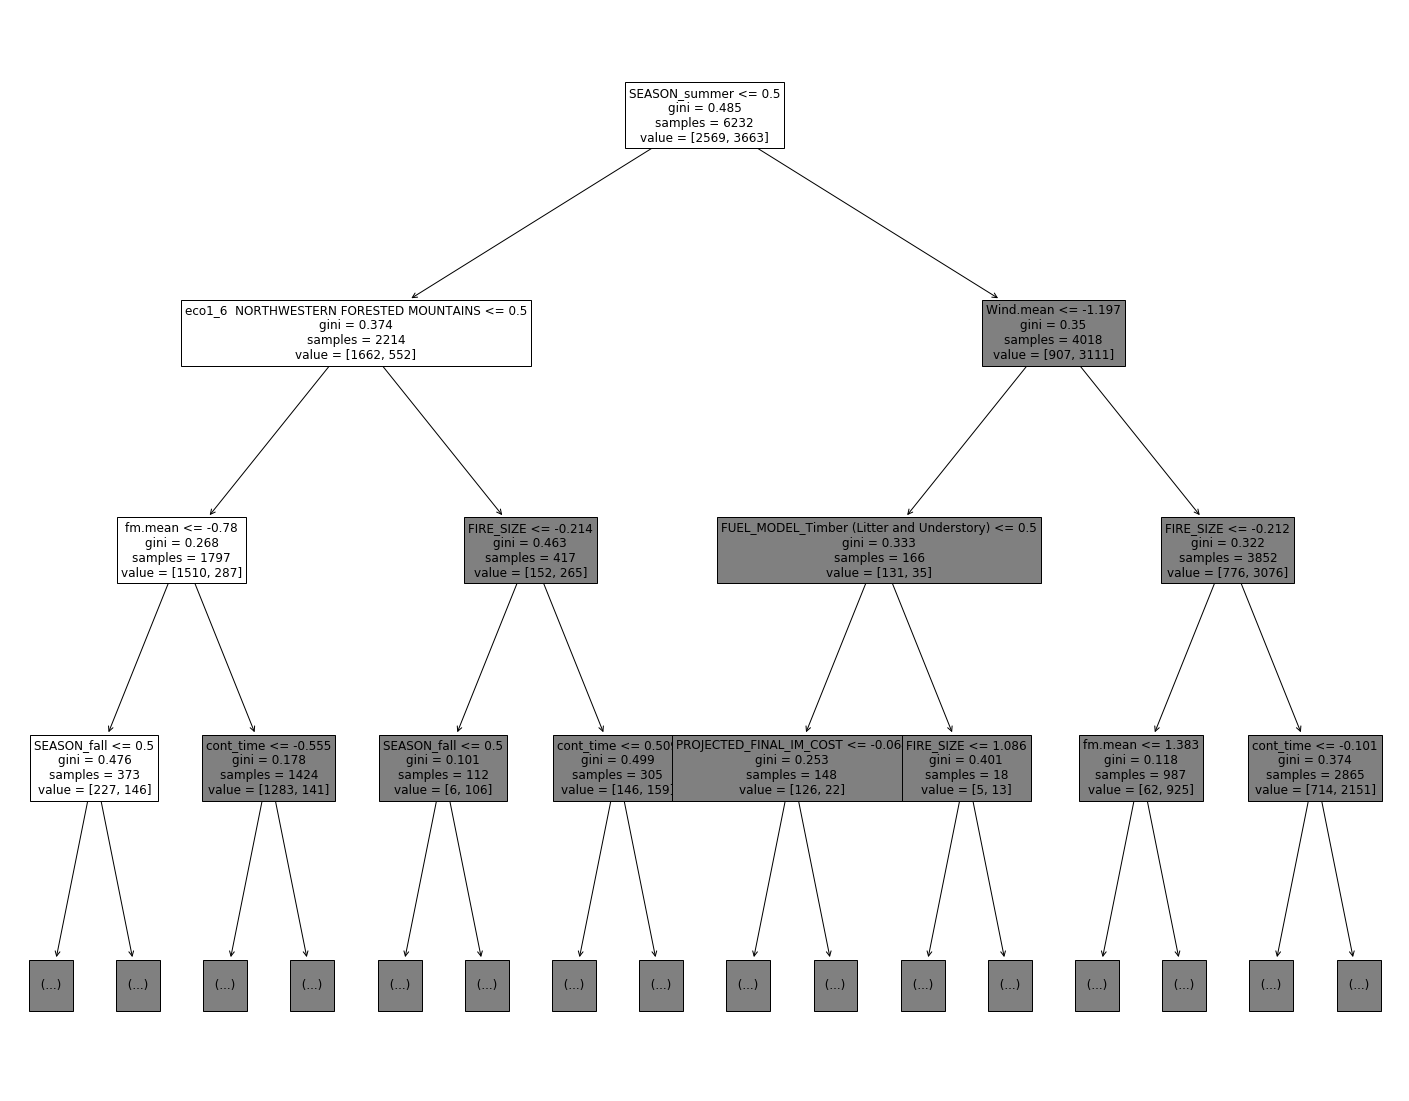

In [18]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, max_depth=3, feature_names=X.columns, fontsize=12)

In [19]:
impt = dtc.feature_importances_
dtc_feat_impt = {}
for i, v in enumerate(impt):
    dtc_feat_impt[X.columns[i]] = v
    
dtc_feat_impt = dict(sorted(dtc_feat_impt.items(), key=lambda item: item[1], reverse=True))
dtc_feat_impt

{'SEASON_summer': 0.2606172291548952,
 'FIRE_SIZE': 0.1261011870082335,
 'TOTAL_PERSONNEL_SUM': 0.1190780401537846,
 'cont_time': 0.10216702354658343,
 'PROJECTED_FINAL_IM_COST': 0.09681105500872408,
 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS': 0.05129205663459284,
 'Wind.mean': 0.04218515545718389,
 'fm.mean': 0.03079959601417383,
 'FUEL_MODEL_Timber (Grass and Understory)': 0.01083158092732251,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.010521228424826704,
 'STR_DAMAGED_TOTAL': 0.01026121835187848,
 'TERRAIN_High': 0.009373645980931055,
 'TERRAIN_Medium': 0.008991361206118813,
 'TERRAIN_Extreme': 0.007894188152894738,
 'SEASON_fall': 0.007475200552406235,
 'GROWTH_POTENTIAL_High': 0.007396289753461079,
 'FUEL_MODEL_Short Grass (1 foot)': 0.007264333154647951,
 'FUEL_MODEL_Hardwood Litter': 0.006900021459631472,
 'FUEL_MODEL_Brush (2 feet)': 0.00686979622289189,
 'GROWTH_POTENTIAL_Low': 0.006770070659494047,
 'TERRAIN_Low': 0.006513125004153688,
 'GROWTH_POTENTIAL_Medium': 0.00637

In [20]:
from sklearn.tree import export_text

text = export_text(dtc, feature_names=X.columns.tolist())
with open("tree_out.txt", 'w') as f:
    f.write(text)

### Logistic Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


print("\n=== Feature var > .2 ===")
lr = LogisticRegressionCV(penalty='l2').fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")


=== Feature var > .2 ===
Per class acc: (0.6588785046728972, 0.8996728462377317)
Total acc: 0.8005131494547787


In [22]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=.2)
X_new = sel.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=13)


print("\n=== Feature var > .2 ===")
lr = LogisticRegressionCV(penalty='l2').fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")


=== Feature var > .2 ===
Per class acc: (0.6152647975077882, 0.88113413304253)
Total acc: 0.7716484926234766


In [23]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2

for i in range(1, 25):
    
    X_new = X.copy()
    X_new[X_new<0] = 0
    X_new.min()
    
    transformer = GenericUnivariateSelect(chi2, mode='k_best', param=i)
    X_new = transformer.fit_transform(X_new, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=13)

    print(f"\n=== k = {i} ===")
    lr = LogisticRegressionCV(penalty='l2').fit(X_train, y_train.values.ravel())
    y_pred = lr.predict(X_test)
    acc_0, acc_1 = per_class_acc(y_test, y_pred)
    print(f"Per class acc: ({acc_0}, {acc_1})")
    print(f"Total acc: {lr.score(X_test, y_test)}")


=== k = 1 ===
Per class acc: (0.5077881619937694, 0.8495092693565977)
Total acc: 0.7087876844130853

=== k = 2 ===
Per class acc: (0.5077881619937694, 0.8495092693565977)
Total acc: 0.7087876844130853

=== k = 3 ===
Per class acc: (0.5031152647975078, 0.8549618320610687)
Total acc: 0.710070558050032

=== k = 4 ===
Per class acc: (0.5654205607476636, 0.8429661941112323)
Total acc: 0.7286722257857601

=== k = 5 ===
Per class acc: (0.470404984423676, 0.9214830970556162)
Total acc: 0.7357280307889673

=== k = 6 ===
Per class acc: (0.6277258566978193, 0.8680479825517994)
Total acc: 0.7690827453495831

=== k = 7 ===
Per class acc: (0.5887850467289719, 0.9007633587786259)
Total acc: 0.77228992944195

=== k = 8 ===
Per class acc: (0.5934579439252337, 0.9029443838604144)
Total acc: 0.7754971135343168

=== k = 9 ===
Per class acc: (0.5934579439252337, 0.9029443838604144)
Total acc: 0.7754971135343168

=== k = 10 ===
Per class acc: (0.5856697819314641, 0.9029443838604144)
Total acc: 0.7722899294

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

c_vals = [0.0005, 0.001, 0.01, 0.1, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


for c in c_vals:
        
    print(f"\n=== c = {c} ===")
    lr = LogisticRegression(penalty='l1', solver='saga', C=c, max_iter=500).fit(X_train, y_train.values.ravel())
    model = SelectFromModel(lr, prefit=True)
    Xtrain_new = model.transform(X_train)
    Xtest_new = model.transform(X_test)
    
    lr = LogisticRegressionCV(penalty='l2', max_iter=500).fit(Xtrain_new, y_train.values.ravel())
    y_pred = lr.predict(Xtest_new)
    acc_0, acc_1 = per_class_acc(y_test, y_pred)
    print(f"Per class acc: ({acc_0}, {acc_1})")
    print(f"Total acc: {lr.score(Xtest_new, y_test)}")


=== c = 0.0005 ===


/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/Users/meganmuniz/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


ValueError: Found array with 0 feature(s) (shape=(6232, 0)) while a minimum of 1 is required.

In [25]:
lr = LogisticRegressionCV(class_weight='balanced').fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")

Per class acc: (0.7040498442367601, 0.8724100327153762)
Total acc: 0.8030788967286723


In [26]:
X_train_new = X_train.drop(columns=['DISCOVERY_DOY'])
X_test_new = X_test.drop(columns=['DISCOVERY_DOY'])
lr = LogisticRegressionCV(class_weight='balanced').fit(X_train_new, y_train.values.ravel())
y_pred = lr.predict(X_test_new)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test_new, y_test)}")

KeyError: "['DISCOVERY_DOY'] not found in axis"

In [16]:
coef = lr.coef_
lr_coef = {}
for i, v in enumerate(coef[0]):
    lr_coef[X.columns[i]] = v
    
lr_coef = dict(sorted(lr_coef.items(), key=lambda item: item[1], reverse=True))
lr_coef

{'TERRAIN_Medium': 1.3635637409848218,
 'FUEL_MODEL_Short Grass (1 foot)': 1.1619221959776524,
 'FIRE_SIZE_CLASS_A': 1.080159686365698,
 'eco1_13  TEMPERATE SIERRAS': 0.8745970222306269,
 'eco1_12  SOUTHERN SEMIARID HIGHLANDS': 0.864004812439471,
 'FIRE_SIZE': 0.7838089799830137,
 'FIRE_YEAR': 0.7646136875568409,
 'FIRE_SIZE_CLASS_B': 0.6154097057502579,
 'FUEL_MODEL_Tall Grass (2.5 feet)': 0.5517698140125452,
 'PROJECTED_FINAL_IM_COST': 0.534201727256256,
 'FUEL_MODEL_Medium Logging Slash': 0.47681730442491577,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.4354115793325596,
 'eco1_9  GREAT PLAINS': 0.4217750871816477,
 'FUEL_MODEL_Timber (Grass and Understory)': 0.3753847101594232,
 'FUEL_MODEL_Chaparral (6 feet)': 0.3375265435541439,
 'cont_time': 0.3303778058408809,
 'eco1_5  NORTHERN FORESTS': 0.2905288948253743,
 'GROWTH_POTENTIAL_Medium': 0.27054454066756944,
 'GROWTH_POTENTIAL_Extreme': 0.25646239866854026,
 'LATITUDE': 0.2358471748856564,
 'eco1_8  EASTERN TEMPERATE FORESTS':